In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
#importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df=pd.read_csv('Micro_Credit_Defaulter_Project.csv')
print(df)

        Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111670  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228330  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_d

In [3]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
#Checking the columns
df.shape

(209593, 37)

In [5]:
#checking the data types of the columns
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [6]:
#Cheking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [8]:
df.isnull().values.any()

False

In [9]:
#Checking for null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [10]:
categorical=df.select_dtypes(include='object')
print(len(categorical.columns))

3


In [11]:
numerical=df.select_dtypes(include=['float64','int64'])
print(len(numerical.columns))

34


In [12]:
categorical.head()

,msisdn,pcircle,pdate
0,21408I70789,UPW,07/20/16
1,76462I70374,UPW,08/10/16
2,17943I70372,UPW,08/19/16
3,55773I70781,UPW,06/06/16
4,03813I82730,UPW,06/22/16


In [13]:
numerical.head()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [14]:
df['pdate'].unique()

array(['07/20/16', '08/10/16', '08/19/16', '06/06/16', '06/22/16',
       '07/02/16', '07/05/16', '08/05/16', '06/15/16', '06/08/16',
       '06/12/16', '06/20/16', '06/29/16', '06/16/16', '08/03/16',
       '06/24/16', '07/04/16', '07/03/16', '07/01/16', '08/08/16',
       '06/26/16', '06/23/16', '07/06/16', '07/09/16', '06/10/16',
       '06/07/16', '06/27/16', '08/11/16', '06/30/16', '06/19/16',
       '07/26/16', '08/14/16', '06/14/16', '06/21/16', '06/25/16',
       '06/28/16', '06/11/16', '07/27/16', '07/23/16', '08/16/16',
       '08/15/16', '06/02/16', '06/05/16', '08/02/16', '07/28/16',
       '07/18/16', '08/18/16', '07/16/16', '07/29/16', '07/21/16',
       '06/03/16', '06/13/16', '08/01/16', '07/13/16', '07/10/16',
       '06/09/16', '07/15/16', '07/11/16', '08/09/16', '08/12/16',
       '07/22/16', '06/04/16', '07/24/16', '06/18/16', '08/13/16',
       '06/17/16', '08/07/16', '07/12/16', '08/06/16', '07/19/16',
       '08/21/16', '08/04/16', '07/25/16', '07/30/16', '08/17/

In [15]:
#Making the new column date
df['date']=pd.to_datetime(df['pdate'],format='%m/%d/%y').dt.day


In [16]:
df['month']=pd.to_datetime(df['pdate'],format="%m/%d/%y").dt.month


In [17]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,date,month
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,2.0,12,6,0.0,29.000000,29.000000,UPW,07/20/16,20,7
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,1.0,12,12,0.0,0.000000,0.000000,UPW,08/10/16,10,8
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,1.0,6,6,0.0,0.000000,0.000000,UPW,08/19/16,19,8
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,2.0,12,6,0.0,0.000000,0.000000,UPW,06/06/16,6,6
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,7.0,42,6,0.0,2.333333,2.333333,UPW,06/22/16,22,6


In [18]:
df.drop(['msisdn','pcircle','pdate'],axis=1)

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
209589,209590,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
209590,209591,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
209591,209592,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


In [19]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,date,month
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,2.0,12,6,0.0,29.000000,29.000000,UPW,07/20/16,20,7
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,1.0,12,12,0.0,0.000000,0.000000,UPW,08/10/16,10,8
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,1.0,6,6,0.0,0.000000,0.000000,UPW,08/19/16,19,8
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,2.0,12,6,0.0,0.000000,0.000000,UPW,06/06/16,6,6
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,7.0,42,6,0.0,2.333333,2.333333,UPW,06/22/16,22,6


In [20]:
categorical.head()

,msisdn,pcircle,pdate
0,21408I70789,UPW,07/20/16
1,76462I70374,UPW,08/10/16
2,17943I70372,UPW,08/19/16
3,55773I70781,UPW,06/06/16
4,03813I82730,UPW,06/22/16


In [21]:
df.drop(['msisdn','pcircle','pdate'],axis=1)

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
209589,209590,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
209590,209591,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
209591,209592,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


In [22]:
df.shape

(209593, 39)

In [23]:
df.corr()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,...,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411,-0.002045,0.003205
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.006825,0.154949
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,0.000662,-0.001863
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.006477,0.518664
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,-0.021508,0.539410
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.036537,0.365699
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.008941,0.429407
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,0.000560,-0.001207
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,0.000631,-0.001800
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.028883,0.096919


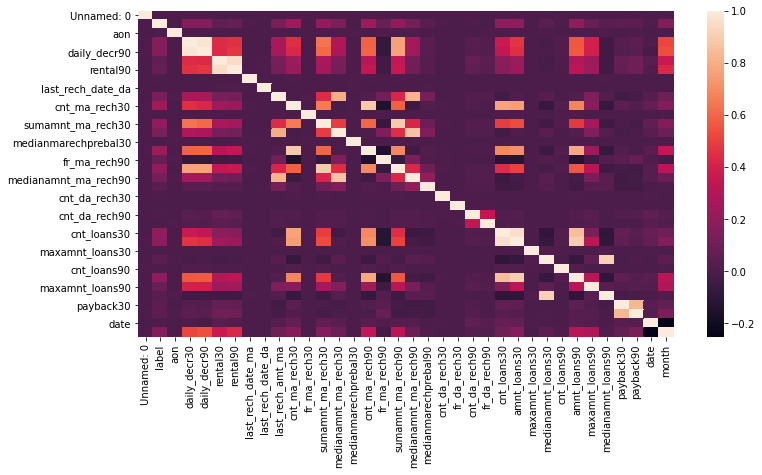

In [24]:
plt.figure(figsize=(12,6))
sn.heatmap(df.corr())
plt.show()

In [25]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [26]:
df.drop(['msisdn','pcircle','pdate'],axis=1)

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
209589,209590,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
209590,209591,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
209591,209592,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


In [27]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

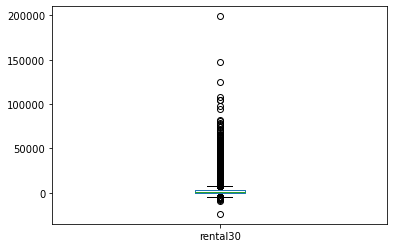

In [28]:
df['rental30'].plot.box()
plt.show()

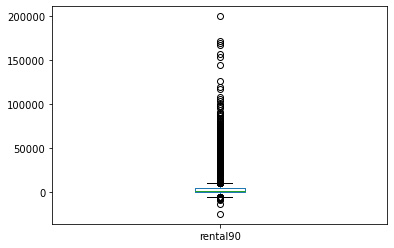

In [29]:
df['rental90'].plot.box()
plt.show()

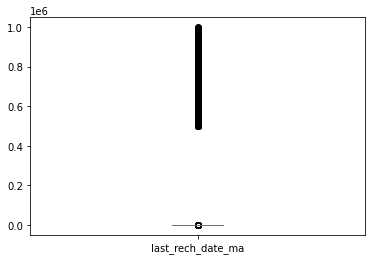

In [30]:
df['last_rech_date_ma'].plot.box()
plt.show()

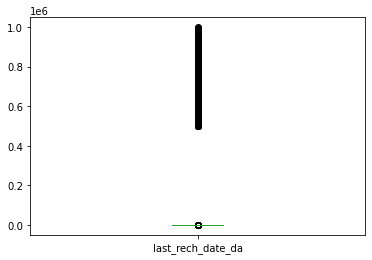

In [31]:
df['last_rech_date_da'].plot.box()
plt.show()

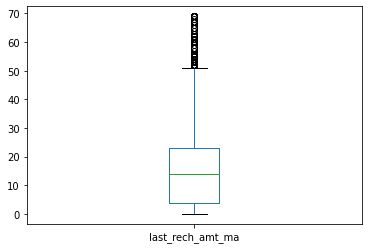

In [32]:
df['last_rech_amt_ma'].plot.box()
plt.show()

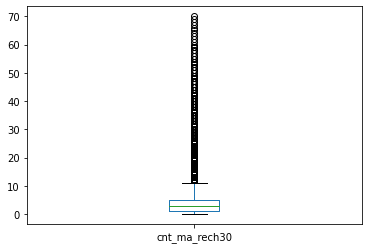

In [33]:
df['cnt_ma_rech30'].plot.box()
plt.show()

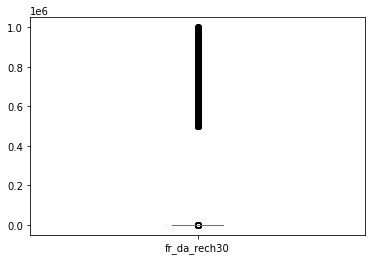

In [34]:
df['fr_da_rech30'].plot.box()
plt.show()

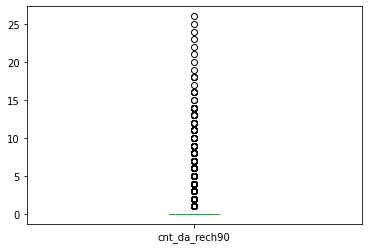

In [35]:
df['cnt_da_rech90'].plot.box()
plt.show()

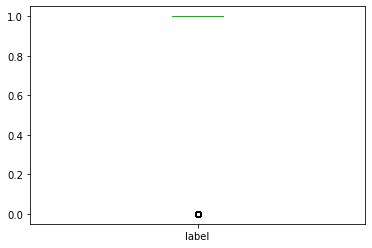

In [36]:
df['label'].plot.box()
plt.show()

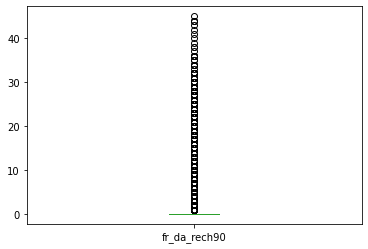

In [37]:
df['fr_da_rech90'].plot.box()
plt.show()

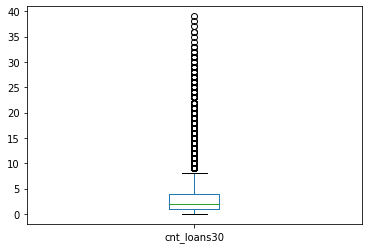

In [38]:
df['cnt_loans30'].plot.box()
plt.show()

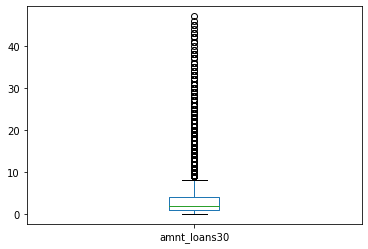

In [39]:
df['amnt_loans30'].plot.box()
plt.show()

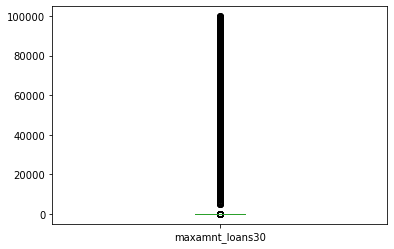

In [40]:
df['maxamnt_loans30'].plot.box()
plt.show()

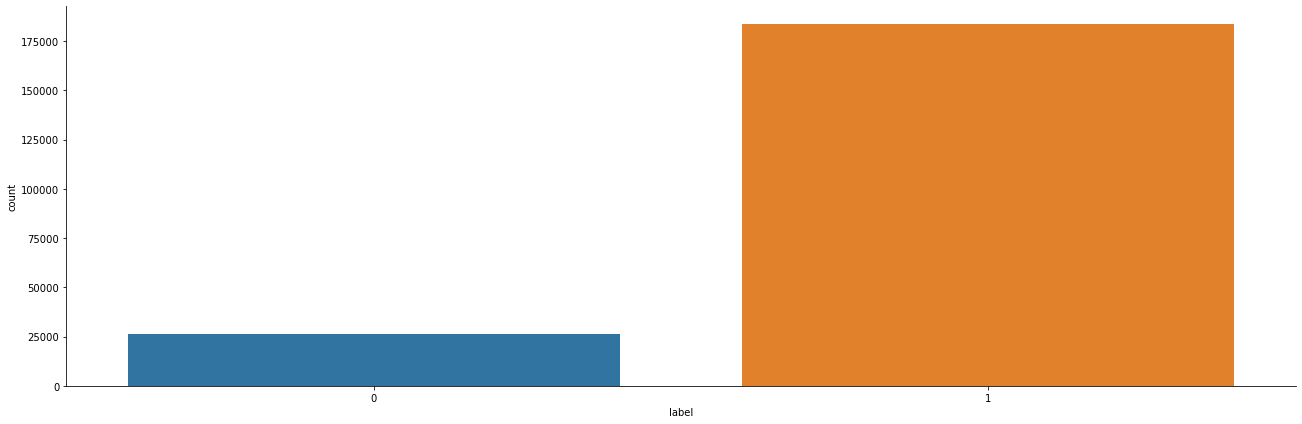

In [41]:
sn.factorplot(data=df,kind='count', size=6, aspect=3, x='label')
plt.show()

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.73204254, 2.64789583, 0.984213  , ..., 0.52239995, 0.6637208 ,
        0.27336037],
       [1.73202602, 0.37765836, 0.91502744, ..., 1.47739785, 0.52127058,
        1.62209905],
       [1.73200949, 0.37765836, 1.10692885, ..., 1.88668266, 0.54522166,
        1.62209905],
       ...,
       [1.73200949, 0.37765836, 0.7274342 , ..., 0.93168476, 1.73021304,
        0.27336037],
       [1.73202602, 0.37765836, 0.34017702, ..., 0.7497804 , 1.25621649,
        0.27336037],
       [1.73204254, 0.37765836, 0.52386948, ..., 0.06878922, 0.87676799,
        0.27336037]])

In [43]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([17, 17, 34, ..., 30, 28, 32], dtype=int64))


In [44]:
df_new=df[(z<0).all(axis=1)]

In [45]:
#Checking the shape
print(df.shape)

(209593, 39)


In [46]:

df.shape

(209593, 39)

In [47]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate', 'date', 'month'],
      dtype='object')

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier (n_estimators=10,criterion='entropy',random_state=0)

In [49]:
x=df.drop(columns=['label'],axis=1)
x.head()

,Unnamed: 0,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,date,month
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,14,...,2.0,2,1,0.0,29.000000,29.000000,0,49,19,1
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,38,...,1.0,2,2,0.0,0.000000,0.000000,0,70,9,2
2,2,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,14,...,1.0,1,1,0.0,0.000000,0.000000,0,79,18,2
3,3,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,10,...,2.0,2,1,0.0,0.000000,0.000000,0,5,5,0
4,4,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,23,...,7.0,7,1,0.0,2.333333,2.333333,0,21,21,0


In [50]:
y=df['label']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [52]:
x_train.head()

,Unnamed: 0,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,date,month
102660,102660,6497,965.0,6056.670000,9096.670,16299.81,24491.63,17.0,0.0,31,...,1.0,2,2,0.0,0.0,0.0,0,73,12,2
203696,203696,182931,562.0,2407.233333,2415.500,5125.74,6284.14,1.0,0.0,4,...,6.0,6,1,0.0,8.0,5.6,0,45,15,1
104428,104428,96306,1104.0,33614.000000,34674.810,3938.25,4512.45,2.0,0.0,4,...,7.0,10,2,0.0,3.0,2.5,0,71,10,2
105386,105386,36440,778.0,7975.000000,11329.000,1199.79,2493.18,1.0,0.0,23,...,0.0,0,0,0.0,0.0,117.0,0,67,6,2
93754,93754,142677,374.0,42.765000,42.765,90.00,90.00,17.0,0.0,24,...,1.0,1,1,0.0,0.0,0.0,0,14,14,0


In [53]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [54]:
rf.score(x_train,y_train)

0.9957264083427052

In [55]:
pred=rf.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test,pred)

0.9168548617958586

Accuracy for tested data= 91.6%

In [58]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [59]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.21032092653945733
Mean Squared Error: 0.09472119005355858
Root Mean Squared Error: 0.3077680783537477


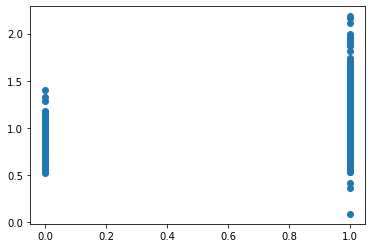

In [60]:
plt.scatter(x=y_test,y=pred)
plt.show()

In [61]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

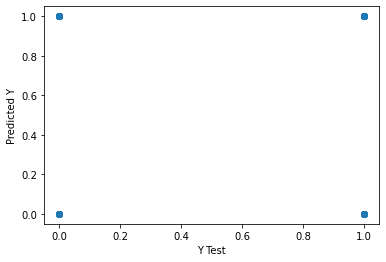

In [62]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.11466649702598683
Mean Squared Error: 0.11466649702598683
Root Mean Squared Error: 0.3386244188270935


In [64]:
print(sum(df['label']==1))
print(sum(df['label']==0))
len(df.index)

183431
26162


209593

# 1.Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# logistic regression object 
lr = LogisticRegression (solver='lbfgs', max_iter=400) 
  
# train the model on train set 
lr.fit(x_train, y_train.ravel()) 
  
predictions = lr.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.02      0.03      7902
           1       0.88      1.00      0.93     54976

    accuracy                           0.87     62878
   macro avg       0.73      0.51      0.48     62878
weighted avg       0.84      0.87      0.82     62878



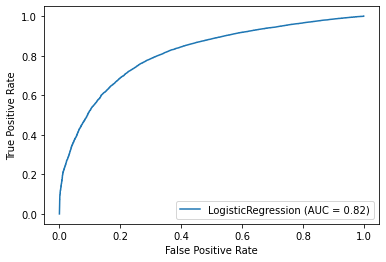

In [66]:
metrics.plot_roc_curve(lr, x_test, y_test) 
plt.show()

# 2. Linear SVM

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

In [ ]:
y_pred = svclassifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
metrics.plot_roc_curve(svclassifier, x_test, y_test) 
plt.show()

# 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train_res,y_train)
y_pred1 = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

In [ ]:
metrics.plot_roc_curve(clf, x_test, y_test) 
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train_res,y_train)
y_pred2=rfc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

In [ ]:
metrics.plot_roc_curve(rfc, x_test, y_test) 
plt.show()

# 5. Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred3=gbc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

In [ ]:
metrics.plot_roc_curve(gbc, x_test, y_test) 
plt.show()